In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
dataset = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [52]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,1


In [53]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [ ]:
print(x)

In [ ]:
print(y)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0 )

In [ ]:
print(x_train)

In [39]:
len(x_train)

344

In [40]:
len(x)

459

In [41]:
len(y)

459

In [42]:
len(y_test)

115

In [43]:
len(y_train)

344

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

In [ ]:
print(x_test)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
y_pred = classifier.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[69 19]
 [16 11]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


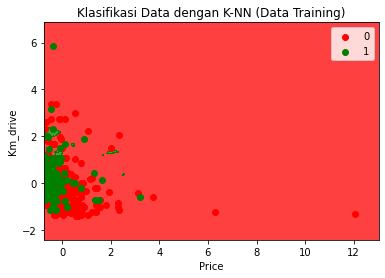

In [60]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min(-1), stop=x_set[:, 0].max()+1, step = 0.01),
                     np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0],  x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Training)')
plt.xlabel('Price')
plt.ylabel('Km_drive')
plt.legend()
plt.show()